# VTMOP Optimization and Result Analysis

This notebook demonstrates the implementation of the VTMOP optimization tool on Delta using Fortran.
The optimization problems are defined and solved using Fortran source code, while Python is used to extract and visualize key results such as discrepancy metrics.


In [1]:
# Not needed for this kernal :)
# !module load gcc/10.2.0
# !module load python/3.8.6


## Compile Fortran Code

In [2]:
# Compile the Fortran program for p=2, budget=1000
# If we were to compile all of our data, it would take a long time, so we are running just one example of our lowest budget and problem.
!gfortran -std=legacy -O2 -fopenmp shared_modules.f90 blas.f lapack.f slatec.f \
qnstop.f90 sVTdirect.f90 bVTdirect.f90 delsparse.f90 linear_shepard.f90 \
vtmop.f90 vtmop_func.f90 samples_p2_1000.f90 -o samples_p2_1000


slatec.f:955:24:

  862 |       CALL DCOPY (N, 0.D0, 0, WS, 1)
      |                     2   
......
  955 |          CALL DCOPY (N, WS, 1, X, 1)
      |                        1
slatec.f:967:25:

  862 |       CALL DCOPY (N, 0.D0, 0, WS, 1)
      |                     2    
......
  967 |       CALL DCOPY (KRANK, W, MDW+1, WS(N2), 1)
      |                         1
slatec.f:3046:25:

  862 |       CALL DCOPY (N, 0.D0, 0, WS, 1)
      |                     2    
......
 3046 |             CALL DCOPY(N,X,0,X,1)
      |                         1
slatec.f:3963:28:

  862 |       CALL DCOPY (N, 0.D0, 0, WS, 1)
      |                     2       
......
 3963 |          CALL DCOPY (NSOLN, Z, 1, X, 1)
      |                            1
slatec.f:4131:25:

  862 |       CALL DCOPY (N, 0.D0, 0, WS, 1)
      |                     2    
......
 4131 |       CALL DCOPY (NSOLN, Z, 1, X, 1)
      |                         1
slatec.f:596:26:

  596 |   160 CALL DCOPY (KRANKE, W, MDW+1, WS(KRAN

## Extract Discrepancy Using Python

In [3]:
# This function assumes a custom parser script that extracts discrepancy values from output files
!python3 analyze_results.py


Current working directory: /u/jvalenzuela/final-project/src
Parsing filename: samples_out_p2_1000.txt
Parsed vtmop_mod.mod â†’ P=2, Budget=1000, Points=64


## Plot Discrepancy (if data structured)

In [4]:
# Example visualization (assumes you structure the parsed data into numeric values)
with open("samples_out_p2_1000.txt", "r") as f:
    for i, line in enumerate(f):
        if i >= 10:
            break
        print(line.strip())

Summary:
Number of nondominated/efficient points:    64
Total number of function evaluations:  2000

Nondominated point set:
1.2087583E-01  1.3389231E-01
1.0626991E-01  1.5071435E-01
1.7259224E-01  8.9258905E-02
1.5656722E-01  1.1212277E-01
9.0831714E-02  1.7972060E-01


## All the results

To display all of the results without running them through the ipynb, below will show the graphs of all of data described in our report.

## Visualizations and Summary Tables â€“ Convex Problem

avg_solutions_p2.png


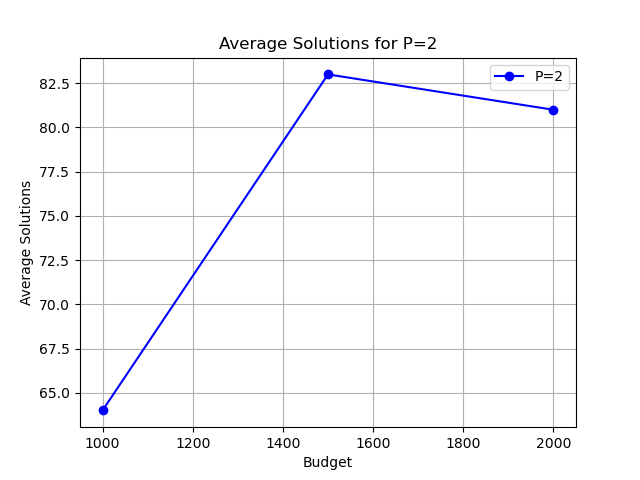

avg_solutions_p3.png


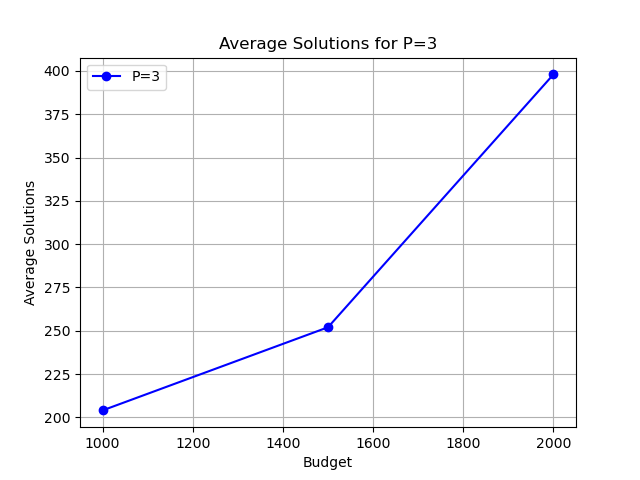

avg_solutions_p4.png


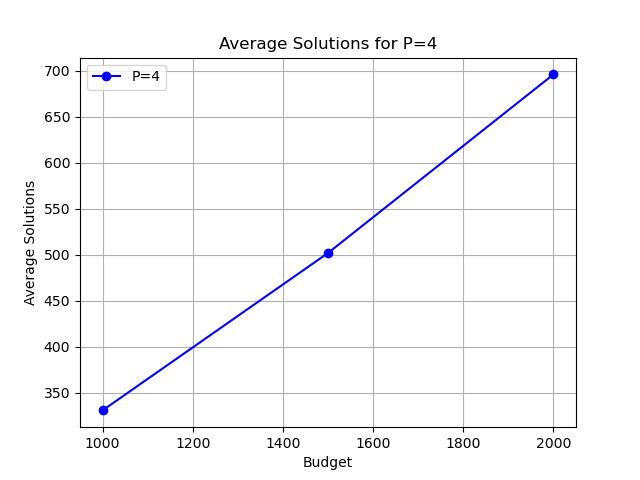

delaunay_p2.png


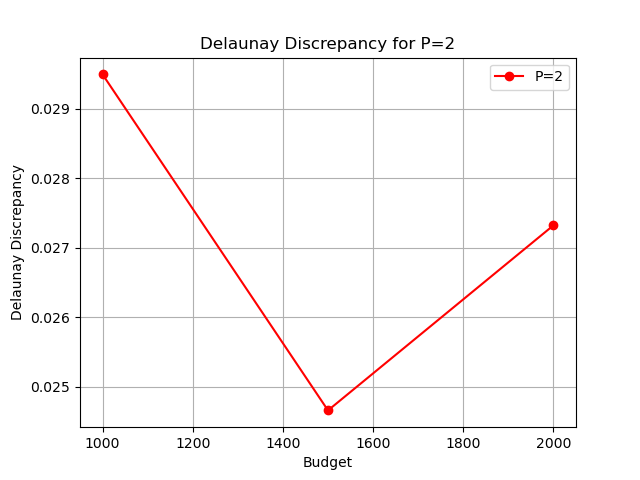

delaunay_p3.png


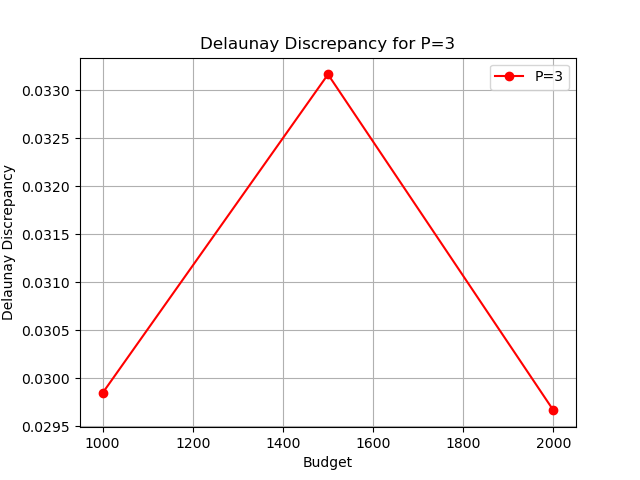

delaunay_p4.png


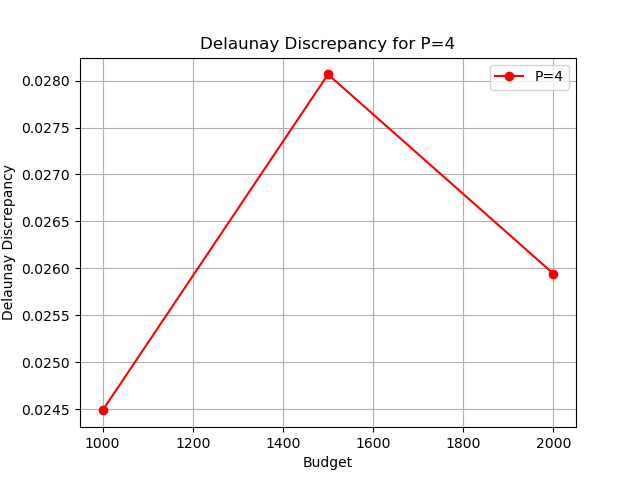

rmse_p2.png


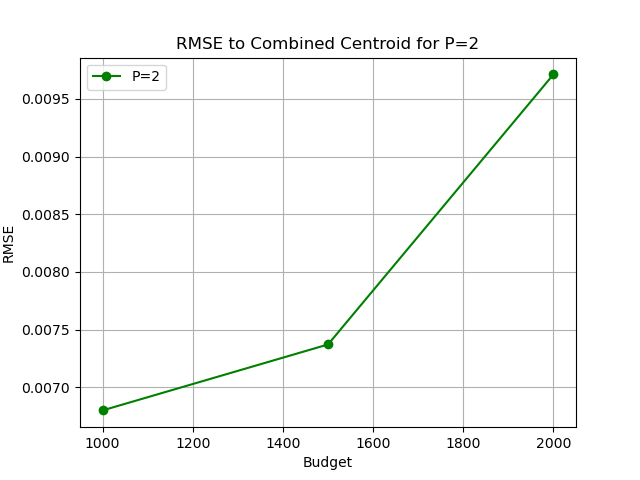

rmse_p3.png


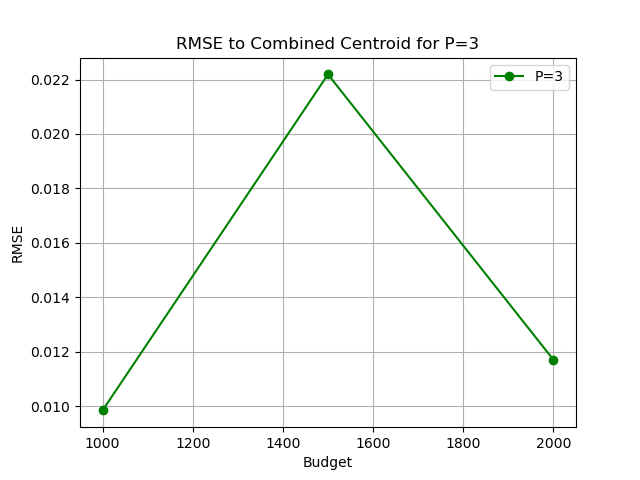

rmse_p4.png


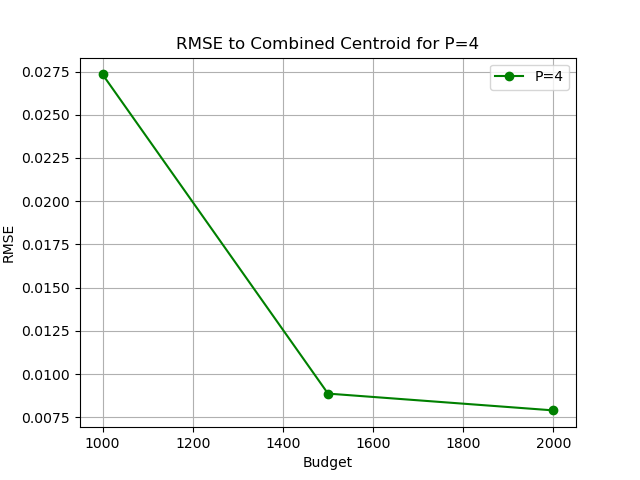

In [5]:
from IPython.display import Image, display

convex_path = "../combined/dir-convex/"
image_files = [
    "avg_solutions_p2.png", "avg_solutions_p3.png", "avg_solutions_p4.png",
    "delaunay_p2.png", "delaunay_p3.png", "delaunay_p4.png",
    "rmse_p2.png", "rmse_p3.png", "rmse_p4.png"
]

for fname in image_files:
    print(f"{fname}")
    display(Image(filename=convex_path + fname))


In [6]:
text_files = ["summary_table_p2.txt", "summary_table_p3.txt", "summary_table_p4.txt"]

for fname in text_files:
    print(f"\nðŸ“„ {fname}")
    with open(f"../combined/dir-convex/{fname}", "r") as f:
        for i, line in enumerate(f):
            if i >= 10:
                break
            print(line.strip())



ðŸ“„ summary_table_p2.txt
Summary Table for P=2
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 64, 0.006799974347220343, 0.02949318568178594
1500: 83, 0.00737142375399603, 0.024658677962480717
2000: 81, 0.009712576578195131, 0.02732149900534768

ðŸ“„ summary_table_p3.txt
Summary Table for P=3
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 204, 0.009841312156461387, 0.029843636161182567
1500: 252, 0.022189290301874564, 0.033166042545918616
2000: 398, 0.011698825191722646, 0.029662931650669657

ðŸ“„ summary_table_p4.txt
Summary Table for P=4
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 331, 0.027334060556644637, 0.024485736105326696
1500: 502, 0.008870824894715296, 0.02806618872496713
2000: 696, 0.00789898235921654, 0.02594184556705022


## Visualizations and Summary Tables â€“ Non-Convex Problem

avg_solutions_p2.png


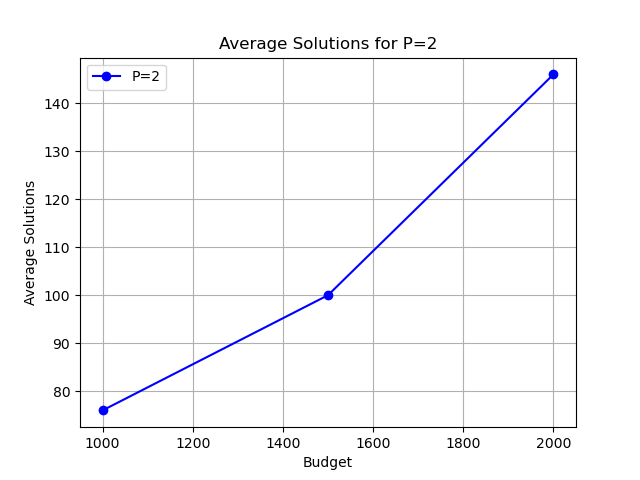

avg_solutions_p3.png


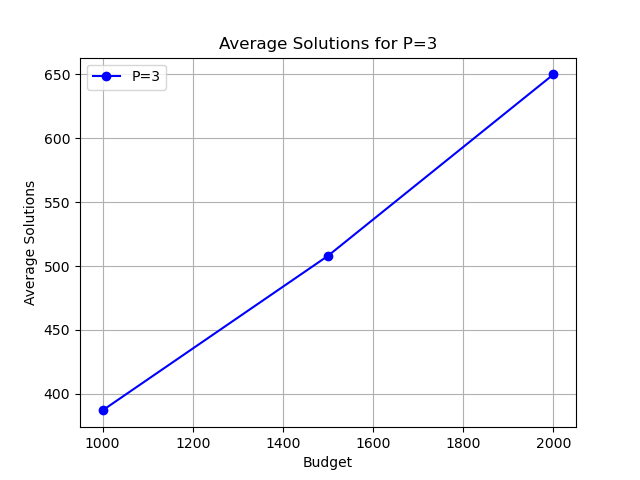

avg_solutions_p4.png


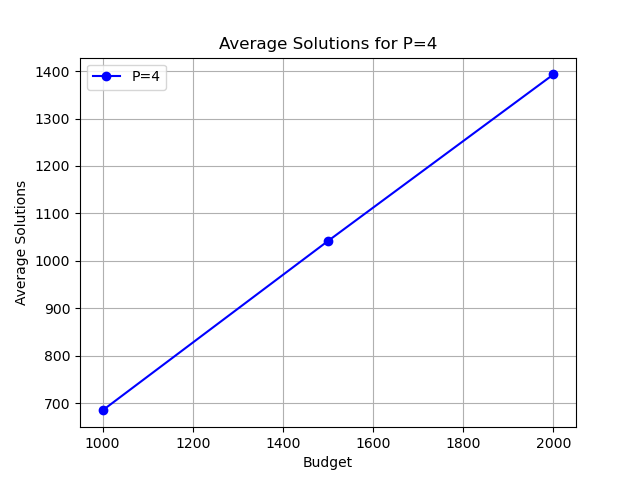

delaunay_p2.png


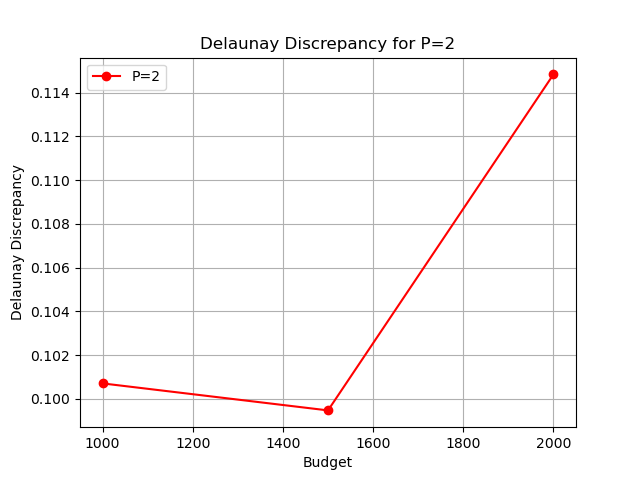

delaunay_p3.png


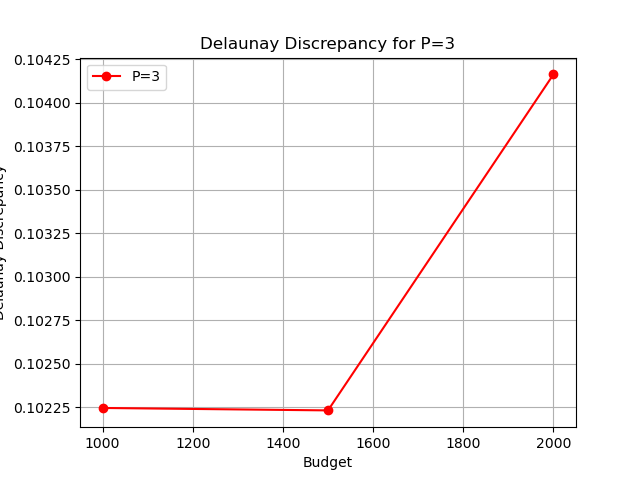

delaunay_p4.png


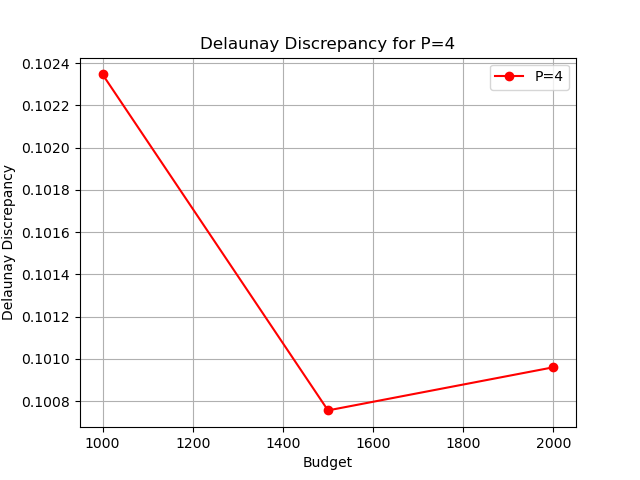

rmse_p2.png


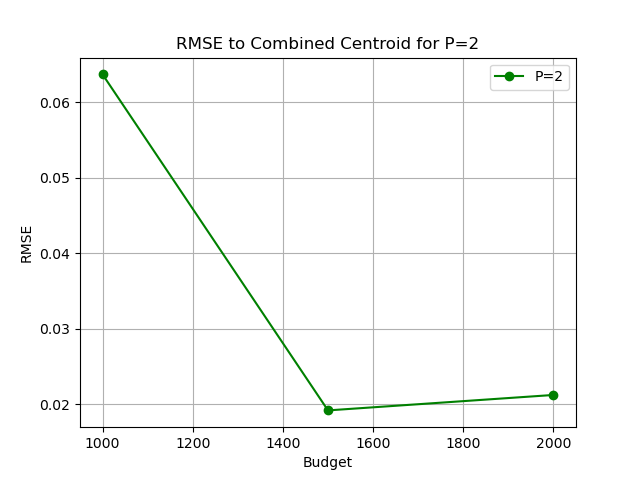

rmse_p3.png


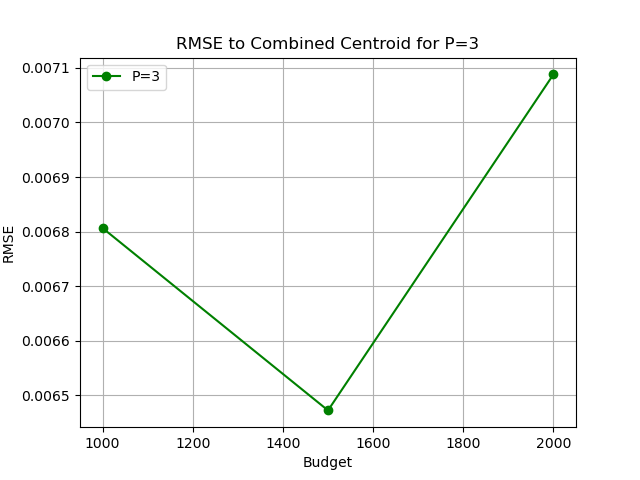

rmse_p4.png


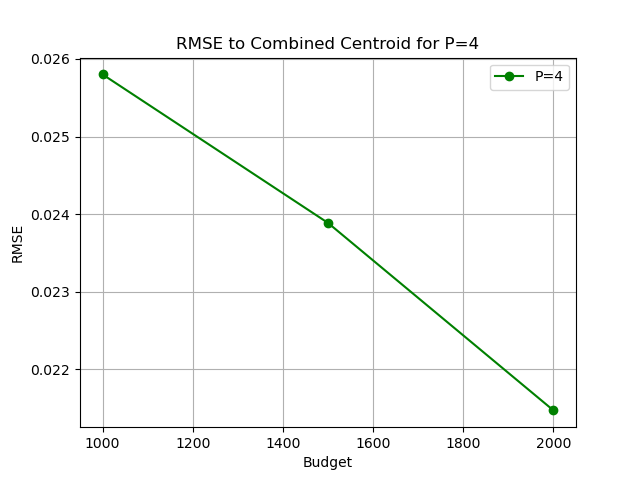

In [7]:
nonconvex_path = "../combined/dir-nonconvex/"
for fname in image_files:
    print(f"{fname}")
    display(Image(filename=nonconvex_path + fname))


In [8]:
for fname in text_files:
    print(f"\nðŸ“„ {fname}")
    with open(f"../combined/dir-nonconvex/{fname}", "r") as f:
        for i, line in enumerate(f):
            if i >= 10:
                break
            print(line.strip())



ðŸ“„ summary_table_p2.txt
Summary Table for P=2
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 76, 0.0636650753535897, 0.10070558728257135
1500: 100, 0.01915426772186298, 0.09947089188636751
2000: 146, 0.021200032427167653, 0.11483605215666275

ðŸ“„ summary_table_p3.txt
Summary Table for P=3
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 387, 0.006806489802028624, 0.10224457035386657
1500: 508, 0.0064721280107493655, 0.10223057704484857
2000: 650, 0.007088189913675183, 0.10416296015571955

ðŸ“„ summary_table_p4.txt
Summary Table for P=4
Budget - Avg Solutions, RMSE (to combined centroid), Delaunay Discrepancy
1000: 685, 0.025800719900700403, 0.10234716547092658
1500: 1042, 0.02388605564525419, 0.10075630178217589
2000: 1393, 0.02146920394728429, 0.10096051707125483
